# `P` mode's Array Values
In this notebook, I want to find out how `P` mode stores the images' values. More precisely, I want to know, if it stores only `256` values per pixel, which `256` RGB values they correspond to.

We shall be using the example images under `../../example_images/`

In [1]:
!ls ../../example_images/

codelearn.png  color_on_terminal.png  cs224n.png


In [12]:
%matplotlib inline
from PIL import Image
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

Let's first read our images, convert them to `P` mode, and finally put them into a list `images`.

In [81]:
example_dir = Path("../../example_images/")
images = []
for path in example_dir.iterdir():
    image_Pmode = Image.open(path).convert("P")
    images.append(image_Pmode)
len(images)

3

In [7]:
np.asarray(images[0])

array([[53, 53, 11, ..., 53, 11, 52],
       [11, 52, 53, ..., 52, 53, 53],
       [53, 53, 11, ..., 53, 11, 52],
       ...,
       [53, 17, 34, ..., 34, 53, 16],
       [53, 46, 53, ..., 16, 47, 53],
       [53, 17, 53, ..., 53, 53, 16]], dtype=uint8)

In [8]:
_.shape

(740, 1264)

We can inspect the corresponding RGB values by

- converting the `Image` object back to `RGB` mode
- then by using `np.asarray`

In [11]:
np.asarray(images[0].convert("RGB"))

array([[[ 51,  51,  51],
        [ 51,  51,  51],
        [ 51,   0,   0],
        ...,
        [ 51,  51,  51],
        [ 51,   0,   0],
        [  0,  51,  51]],

       [[ 51,   0,   0],
        [  0,  51,  51],
        [ 51,  51,  51],
        ...,
        [  0,  51,  51],
        [ 51,  51,  51],
        [ 51,  51,  51]],

       [[ 51,  51,  51],
        [ 51,  51,  51],
        [ 51,   0,   0],
        ...,
        [ 51,  51,  51],
        [ 51,   0,   0],
        [  0,  51,  51]],

       ...,

       [[ 51,  51,  51],
        [ 51,  51,   0],
        [  0, 204,   0],
        ...,
        [  0, 204,   0],
        [ 51,  51,  51],
        [  0,  51,   0]],

       [[ 51,  51,  51],
        [  0,   0,  51],
        [ 51,  51,  51],
        ...,
        [  0,  51,   0],
        [ 51,   0,  51],
        [ 51,  51,  51]],

       [[ 51,  51,  51],
        [ 51,  51,   0],
        [ 51,  51,  51],
        ...,
        [ 51,  51,  51],
        [ 51,  51,  51],
        [  0,  51,   0]]

Let's really show these images in order to inspect less blindly.

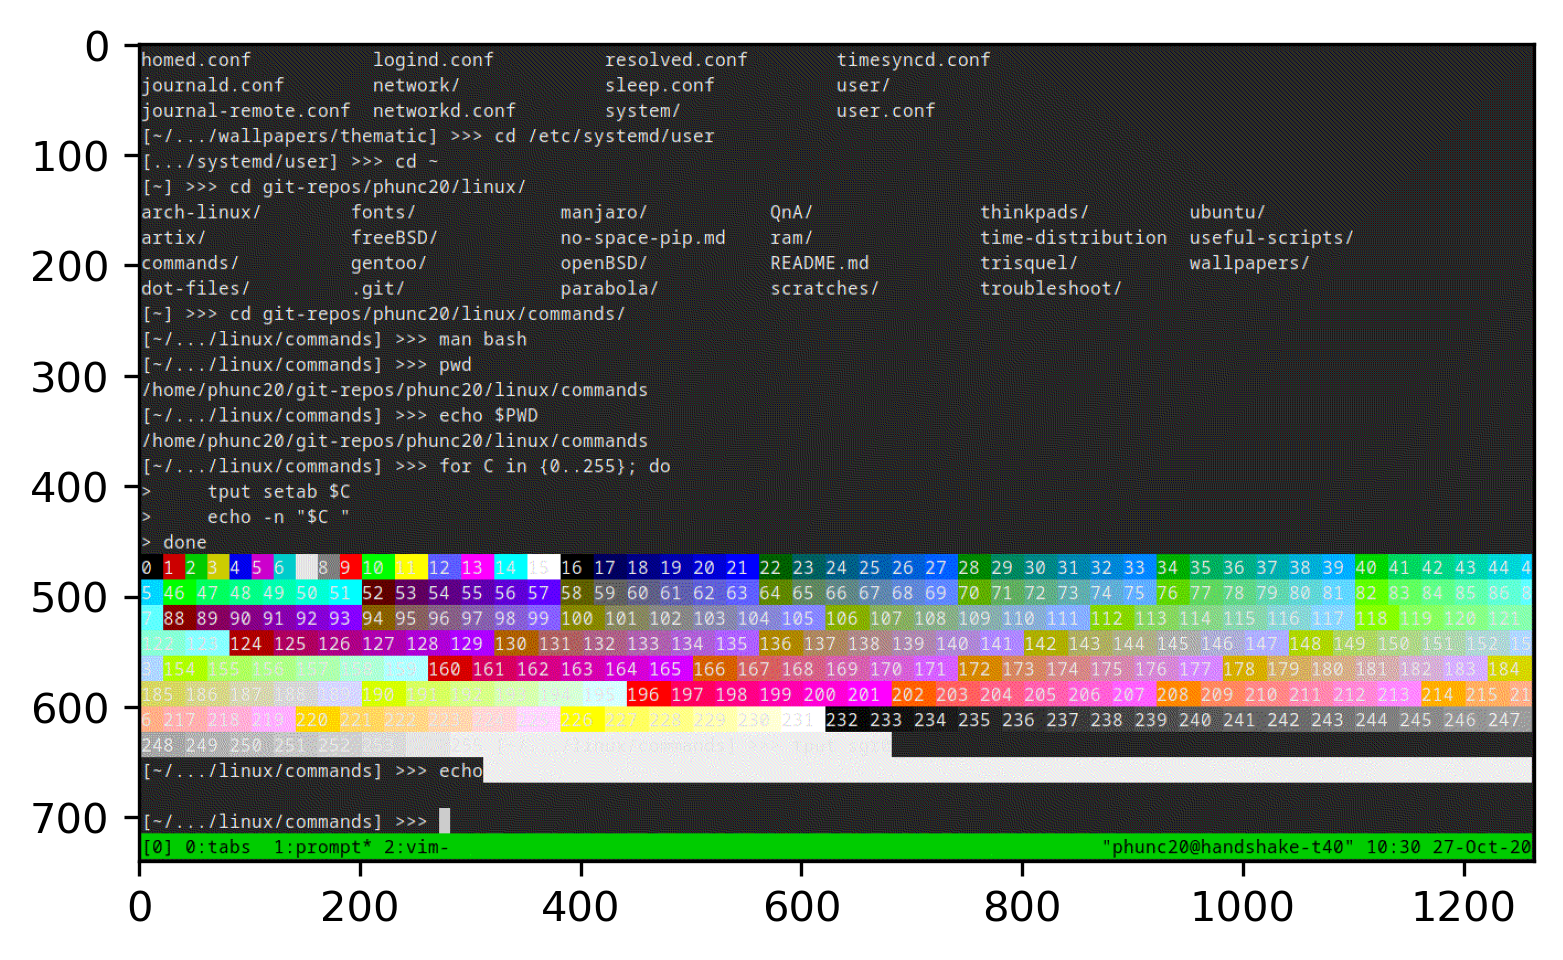

In [34]:
#plt.figure(figsize=(20, 30));
plt.figure(dpi=300);
plt.imshow(np.asarray(images[0].convert("RGB")));

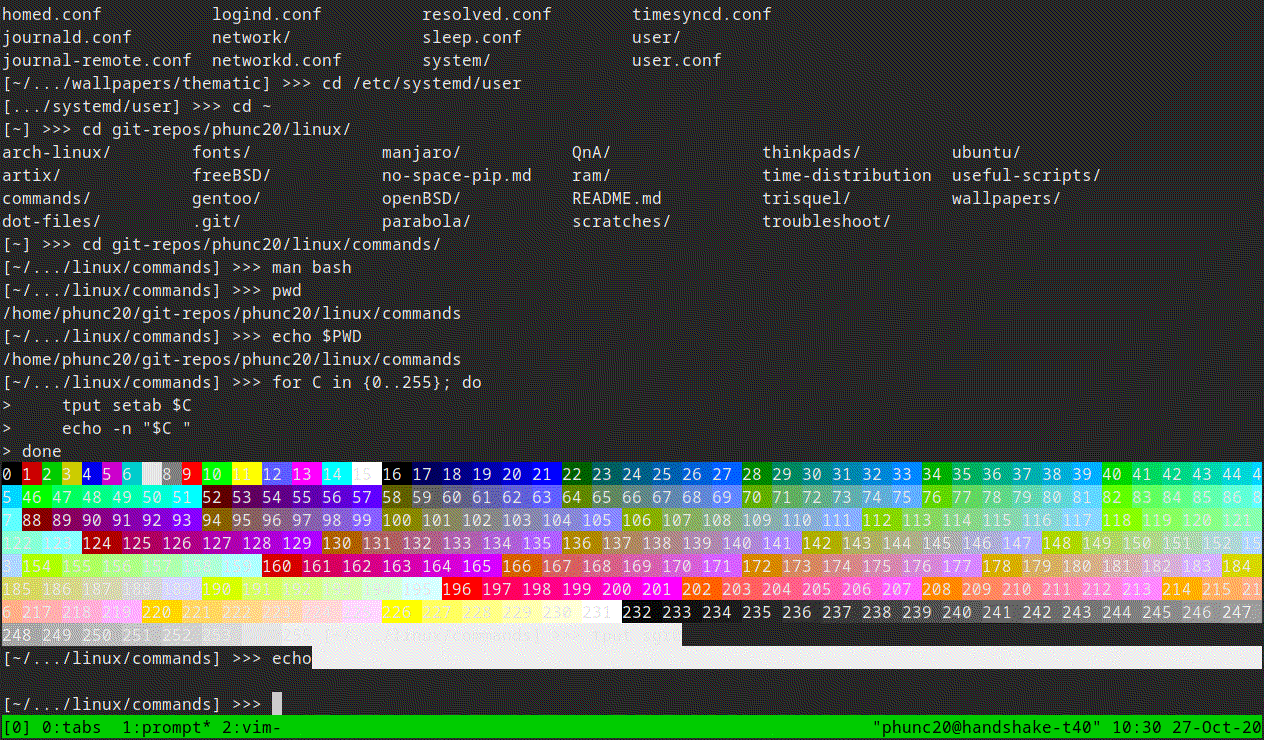

In [83]:
images[0]

**(?)** We could notice that there is a severe degradation in the second image.

- Why? What went wrong?
- Would the same degradation persist had we saved into a file and read by `cv2.imread`?

In [24]:
arrays = [np.asarray(image.convert("RGB")) for image in images]
len(arrays)

3

arrays[2][0, 0]             = [153 153 153]
np.asarray(images[0])[0, 0] = 139

arrays[2][0, 1]             = [102 102 102]
np.asarray(images[0])[0, 1] = 96

arrays[2][0, 2]             = [153 153 153]
np.asarray(images[0])[0, 2] = 139

arrays[2][0, 3]             = [102 102 102]
np.asarray(images[0])[0, 3] = 96

arrays[2][0, 4]             = [102 102 102]
np.asarray(images[0])[0, 4] = 96

arrays[2][1, 0]             = [102 102 102]
np.asarray(images[0])[1, 0] = 96

arrays[2][1, 1]             = [102 102 102]
np.asarray(images[0])[1, 1] = 96

arrays[2][1, 2]             = [102 102 102]
np.asarray(images[0])[1, 2] = 96

arrays[2][1, 3]             = [102 102 102]
np.asarray(images[0])[1, 3] = 96

arrays[2][1, 4]             = [102 102 102]
np.asarray(images[0])[1, 4] = 96

arrays[2][2, 0]             = [153 153 153]
np.asarray(images[0])[2, 0] = 139

arrays[2][2, 1]             = [102 102 102]
np.asarray(images[0])[2, 1] = 96

arrays[2][2, 2]             = [102 102 102]
np.asarray(images

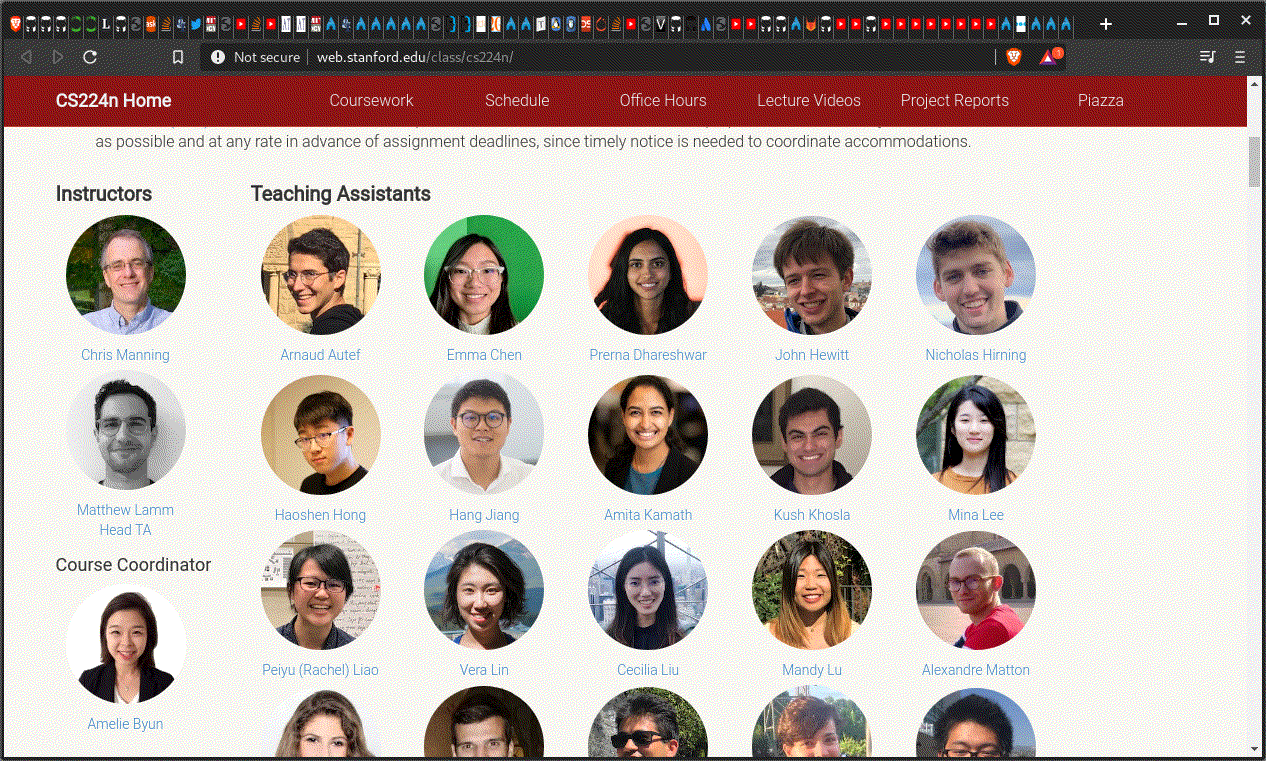

In [42]:
image_index = 2
n_rows = 3
n_cols = 5
for i in range(n_rows):
    for j in range(n_cols):
        print(f"arrays[{image_index}][{i}, {j}]             = {arrays[image_index][i, j]}")
        print(f"np.asarray(images[0])[{i}, {j}] = {np.asarray(images[image_index])[i, j]}")
        print()
images[image_index]

## Mapping btw `P` Values and `RGB` Values

Let's first see how many diff `P` values we have in one image.

In [38]:
np.unique(np.asarray(images[0]))

array([  0,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

In [50]:
np.arange(256).dtype

dtype('int64')

In [51]:
np.arange(256, dtype=np.uint8).dtype

dtype('uint8')

In [53]:
array_uint8 = np.arange(256, dtype=np.uint8)
array_uint8

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [54]:
image_uint8 = Image.fromarray(array_uint8)

In [70]:
np.repeat(array_uint8[np.newaxis, :], 20, axis=0)

array([[  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       ...,
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255]], dtype=uint8)

In [71]:
Image.fromarray(_, mode="P")

In [73]:
array_int8 = np.arange(256, dtype=np.int8)
array_int8

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127, -128, -127, -126, -125,
       -124, -123, -122, -121, -120, -119, -118, -117, -116, -115, -114,
       -113, -112, -111, -110, -109, -108, -107, -1

In [74]:
image_int8 = Image.fromarray(array_int8)

In [78]:
np.repeat(array_int8[np.newaxis, :], 20, axis=0)

array([[ 0,  1,  2, ..., -3, -2, -1],
       [ 0,  1,  2, ..., -3, -2, -1],
       [ 0,  1,  2, ..., -3, -2, -1],
       ...,
       [ 0,  1,  2, ..., -3, -2, -1],
       [ 0,  1,  2, ..., -3, -2, -1],
       [ 0,  1,  2, ..., -3, -2, -1]], dtype=int8)

In [79]:
K = Image.fromarray(_, mode="P")
K

In [80]:
K.mode

'P'